In [28]:
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from numpy import inf

# Load the dataset
dataset_path= r'C:\Project INSE 6220\Prostate Cancer Project\Prostate_Cancer.csv'
dataset=pd.read_csv(dataset_path)
dataset



id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0     1                M      23       12        151   954       0.143   
1     2                B       9       13        133  1326       0.143   
2     3                M      21       27        130  1203       0.125   
3     4                M      14       16         78   386       0.070   
4     5                M       9       19        135  1297       0.141   
..  ...              ...     ...      ...        ...   ...         ...   
95   96                M      23       16        132  1264       0.091   
96   97                B      22       14         78   451       0.105   
97   98                B      19       27         62   295       0.102   
98   99                B      21       24         74   413       0.090   
99  100                M      16       27         94   643       0.098   

    compactness  symmetry  fractal_dimension  
0         0.278     0.242              0.079  
1         0.079     0.181              0.057  
2         0.160     0.207              0.060  
3         0.284     0.260              0.097  
4         0.133     0.181              0.059  
..          ...       ...                ...  
95        0.131     0.210              0.056  
96        0.071     0.190              0.066  
97        0.053     0.135              0.069  
98        0.075     0.162              0.066  
99        0.114     0.188              0.064  

[100 rows x 10 columns]

In [29]:
df=pd.read_csv(r'C:\Project INSE 6220\Prostate Cancer Project\Prostate_Cancer.csv')
df

id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0     1                M      23       12        151   954       0.143   
1     2                B       9       13        133  1326       0.143   
2     3                M      21       27        130  1203       0.125   
3     4                M      14       16         78   386       0.070   
4     5                M       9       19        135  1297       0.141   
..  ...              ...     ...      ...        ...   ...         ...   
95   96                M      23       16        132  1264       0.091   
96   97                B      22       14         78   451       0.105   
97   98                B      19       27         62   295       0.102   
98   99                B      21       24         74   413       0.090   
99  100                M      16       27         94   643       0.098   

    compactness  symmetry  fractal_dimension  
0         0.278     0.242              0.079  
1         0.079     0.181              0.057  
2         0.160     0.207              0.060  
3         0.284     0.260              0.097  
4         0.133     0.181              0.059  
..          ...       ...                ...  
95        0.131     0.210              0.056  
96        0.071     0.190              0.066  
97        0.053     0.135              0.069  
98        0.075     0.162              0.066  
99        0.114     0.188              0.064  

[100 rows x 10 columns]

In [30]:
import pandas as pd
import numpy as np

# Assuming 'df' is your original DataFrame with prostate cancer data
# Make sure 'df' is defined before running this code

# Define the number of augmented samples you want to create
num_augmented_samples = 430  # Adjust this as needed

# Initialize an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Define the range for random data modification
# You can adjust these ranges as needed
radius_range = (-5, 5)
texture_range = (-5, 5)
perimeter_range = (-10, 10)
area_range = (-100, 100)
smoothness_range = (-0.02, 0.02)
compactness_range = (-0.02, 0.02)
symmetry_range = (-0.02, 0.02)
fractal_dimension_range = (-0.01, 0.01)

for _ in range(num_augmented_samples):
    # Randomly select an existing row to modify
    original_row = df.sample(1)
    # Create a new row with random modifications
    augmented_row = original_row.copy()
    augmented_row['radius'] += np.random.uniform(*radius_range)
    augmented_row['texture'] += np.random.uniform(*texture_range)
    augmented_row['perimeter'] += np.random.uniform(*perimeter_range)
    augmented_row['area'] += np.random.uniform(*area_range)
    augmented_row['smoothness'] += np.random.uniform(*smoothness_range)
    augmented_row['compactness'] += np.random.uniform(*compactness_range)
    augmented_row['symmetry'] += np.random.uniform(*symmetry_range)
    augmented_row['fractal_dimension'] += np.random.uniform(*fractal_dimension_range)

    # Append the augmented row to the new DataFrame
    augmented_data = pd.concat([augmented_data, augmented_row], ignore_index=True)

# Concatenate the original data and the augmented data
augmented_dataset = pd.concat([df, augmented_data], ignore_index=True, sort=False)

augmented_dataset


id diagnosis_result     radius    texture   perimeter         area  \
0     1                M  23.000000  12.000000  151.000000   954.000000   
1     2                B   9.000000  13.000000  133.000000  1326.000000   
2     3                M  21.000000  27.000000  130.000000  1203.000000   
3     4                M  14.000000  16.000000   78.000000   386.000000   
4     5                M   9.000000  19.000000  135.000000  1297.000000   
..   ..              ...        ...        ...         ...          ...   
525  47                B  24.074894   8.105912   54.238497   161.751842   
526  51                B  16.748040  24.500263   79.409779   508.445305   
527  93                B  18.597015   9.578346   79.918269   476.768582   
528  74                M  26.390815  29.318040   80.528840   492.190043   
529  70                B  15.539978  19.904250   87.541455   578.354913   

     smoothness  compactness  symmetry  fractal_dimension  
0      0.143000     0.278000  0.242000           0.079000  
1      0.143000     0.079000  0.181000           0.057000  
2      0.125000     0.160000  0.207000           0.060000  
3      0.070000     0.284000  0.260000           0.097000  
4      0.141000     0.133000  0.181000           0.059000  
..          ...          ...       ...                ...  
525    0.096107     0.060688  0.173496           0.065686  
526    0.084694     0.068430  0.151054           0.054675  
527    0.089480     0.062345  0.121873           0.051216  
528    0.089675     0.146271  0.172119           0.074053  
529    0.106542     0.044222  0.140934           0.049861  

[530 rows x 10 columns]

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming 'augmented_dataset' is your DataFrame

# Separate features (X) and target variable
X = augmented_dataset.drop(columns=['id', 'diagnosis_result'])
y = augmented_dataset['diagnosis_result']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the shape, column names, and head of the augmented dataset
print(augmented_dataset.shape)
print(augmented_dataset.columns)
print(augmented_dataset.head())

# Remove leading and trailing whitespaces from column names
augmented_dataset.columns = augmented_dataset.columns.str.strip()

# Display the updated column names
print(augmented_dataset.columns)


(530, 10)
Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')
  id diagnosis_result  radius  texture  perimeter    area  smoothness  \
0  1                M    23.0     12.0      151.0   954.0       0.143   
1  2                B     9.0     13.0      133.0  1326.0       0.143   
2  3                M    21.0     27.0      130.0  1203.0       0.125   
3  4                M    14.0     16.0       78.0   386.0       0.070   
4  5                M     9.0     19.0      135.0  1297.0       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  
Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness

In [32]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix

# Step 1: Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [33]:
# Step 3: Calculate eigenvectors and eigenvalues
c_matrix = np.cov(X_standardized.T)
eig_value, eig_vector = np.linalg.eig(c_matrix)
print('Eigenvalues:', eig_value,4)
print('Eigenvectors: ', eig_vector,4)

Eigenvalues: [2.91606019 1.79920552 1.04068262 0.88537752 0.67773079 0.47921654
 0.16769487 0.04915483] 4
Eigenvectors:  [[-0.17394789 -0.17961651  0.54775358 -0.73422333 -0.30900661 -0.05322551
   0.0062188   0.00233237]
 [ 0.04446932 -0.14133991  0.80259124  0.55533275  0.15190619  0.04866716
   0.00183407 -0.00714099]
 [ 0.44482654  0.44449778  0.13453887 -0.13135394  0.05056672 -0.09693824
  -0.11844782 -0.73702958]
 [ 0.40213054  0.50199767  0.1492115  -0.10615921  0.01155885 -0.08580799
  -0.33578441  0.6576532 ]
 [ 0.34656694 -0.18553789 -0.07534347  0.27831921 -0.86949799 -0.07599639
  -0.01913325 -0.01267028]
 [ 0.52580104 -0.1576076   0.01166045 -0.14087988  0.18791643 -0.11642803
   0.7788229   0.15256743]
 [ 0.38616755 -0.35705607 -0.0493913  -0.1519642   0.12367092  0.78069481
  -0.26990439 -0.01502377]
 [ 0.24996845 -0.5580569  -0.08483177 -0.05996798  0.26854235 -0.5909511
  -0.43976964 -0.02366767]] 4


In [34]:
# Step 2: Calculate covariance
avg_vec = np.mean(X_standardized, axis=0)
c_matrix = (X_standardized - avg_vec).T.dot((X_standardized - avg_vec)) / (X_standardized.shape[0]-1)
print('Covariance Matrix: ' ,c_matrix)

Covariance Matrix:  [[ 1.00189036  0.08657165 -0.21552648 -0.21264707 -0.15569778 -0.15310183
  -0.05595577  0.00254949]
 [ 0.08657165  1.00189036 -0.00439659 -0.00422521  0.07474705  0.06555142
   0.05576602  0.08772587]
 [-0.21552648 -0.00439659  1.00189036  0.94355275  0.23281785  0.56486063
   0.19999542 -0.08071302]
 [-0.21264707 -0.00422521  0.94355275  1.00189036  0.19794229  0.45661178
   0.12053467 -0.16804746]
 [-0.15569778  0.07474705  0.23281785  0.19794229  1.00189036  0.43927278
   0.37544958  0.29548534]
 [-0.15310183  0.06555142  0.56486063  0.45661178  0.43927278  1.00189036
   0.64853204  0.55752525]
 [-0.05595577  0.05576602  0.19999542  0.12053467  0.37544958  0.64853204
   1.00189036  0.4737631 ]
 [ 0.00254949  0.08772587 -0.08071302 -0.16804746  0.29548534  0.55752525
   0.4737631   1.00189036]]


In [74]:
true_labels = [45, 14, 6, 96, 38, 86, 15, 78]
predicted_scores = [23, 3, 11, 17, 19, 5, 33, 12]


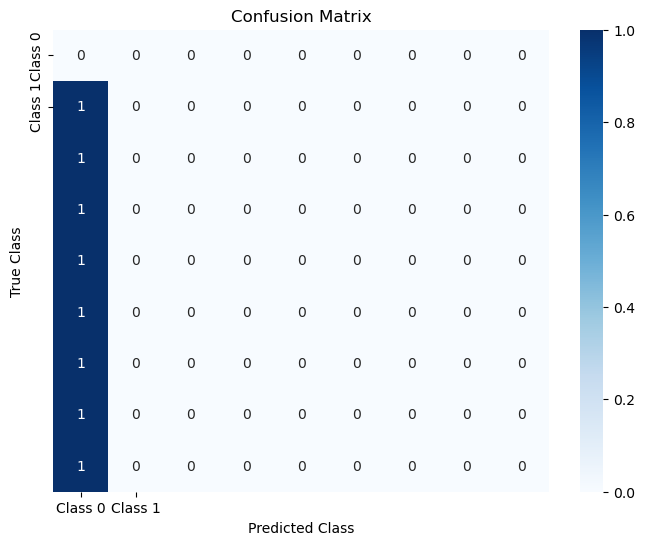

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Replace [45, 14, 6, 96, 38, 86, 15, 78] and [23, 3, 11, 17, 19, 5, 33, 12] with your actual data
true_labels = [45, 14, 6, 96, 38, 86, 15, 78]
predicted_scores = [23, 3, 11, 17, 19, 5, 33, 12]

# Convert predicted scores to a NumPy array
predicted_scores_array = np.array(predicted_scores)

# Convert predicted scores array to predicted labels (e.g., using a threshold)
threshold = 0.5
predicted_labels = np.where(predicted_scores_array >= threshold, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()




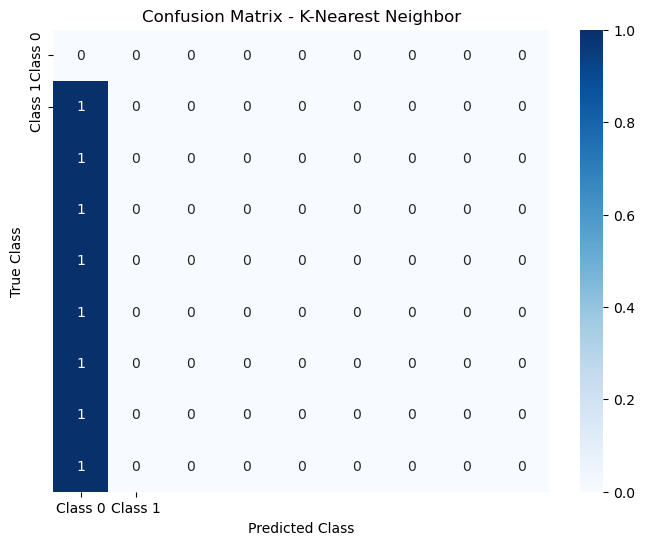

In [78]:
# Replace [...] with your actual data for K-Nearest Neighbor
true_labels_knn = [45, 14, 6, 96, 38, 86, 15, 78]
predicted_scores_knn = [23, 3, 11, 17, 19, 5, 33, 12]

# Convert predicted scores to a NumPy array
predicted_scores_array_knn = np.array(predicted_scores_knn)

# Convert predicted scores array to predicted labels (e.g., using a threshold)
threshold_knn = 0.5
predicted_labels_knn = np.where(predicted_scores_array_knn >= threshold_knn, 1, 0)

# Confusion Matrix for K-Nearest Neighbor
cm_knn = confusion_matrix(true_labels_knn, predicted_labels_knn)

# Plotting the Confusion Matrix for K-Nearest Neighbor
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - K-Nearest Neighbor")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


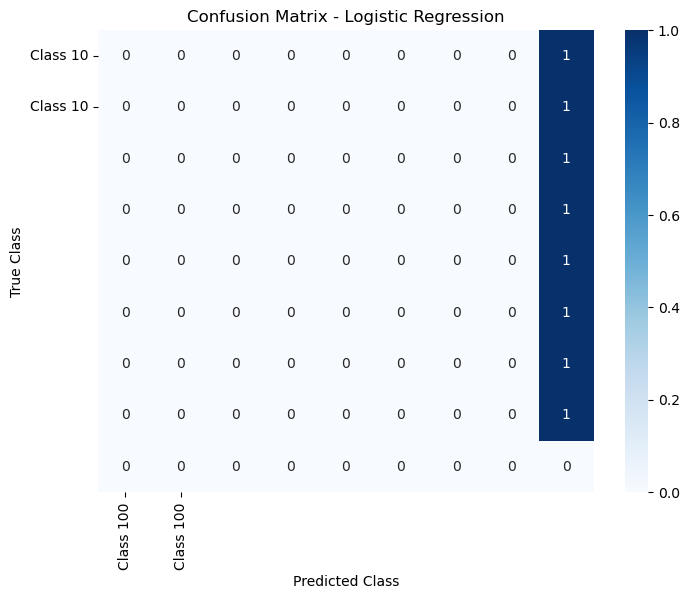

In [77]:
# Replace [...] with your actual data for Logistic Regression
true_labels_lr = [45, 14, 6, 96, 38, 86, 15, 78]
predicted_scores_lr = [23, 3, 11, 17, 19, 5, 33, 12]

# Convert predicted scores to a NumPy array
predicted_scores_array_lr = np.array(predicted_scores_lr)

# Convert predicted scores array to predicted labels (e.g., using a threshold)
threshold_lr = 0.5
predicted_labels_lr = np.where(predicted_scores_array_lr >= threshold_lr, 100, 10)

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(true_labels_lr, predicted_labels_lr)

# Plotting the Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 100", "Class 100"], yticklabels=["Class 10", "Class 10"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


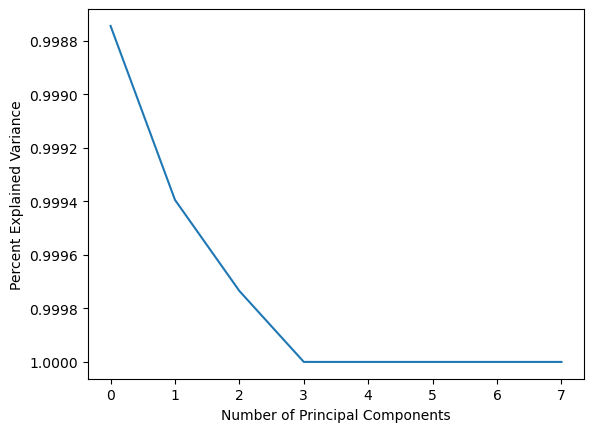

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Perform Principal Component Analysis (PCA)
num_components = 2  # Choose the number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.gca().invert_yaxis()
plt.xlabel('Number of Principal Components')
plt.ylabel('Percent Explained Variance')
plt.show()

In [36]:
# Step 5: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [9.98743736e-01 6.50461024e-04 3.40541127e-04 2.65223573e-04
 3.04701886e-08 4.88920087e-09 2.51458110e-09 3.83167039e-10]


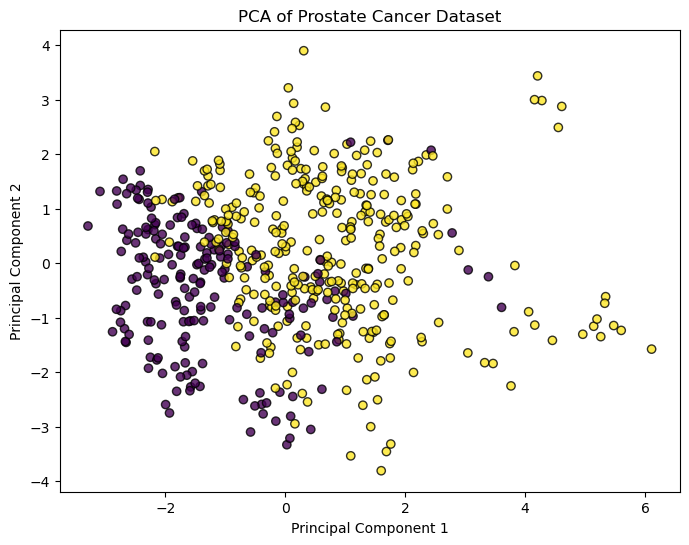

In [37]:
# Step 6: Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('PCA of Prostate Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

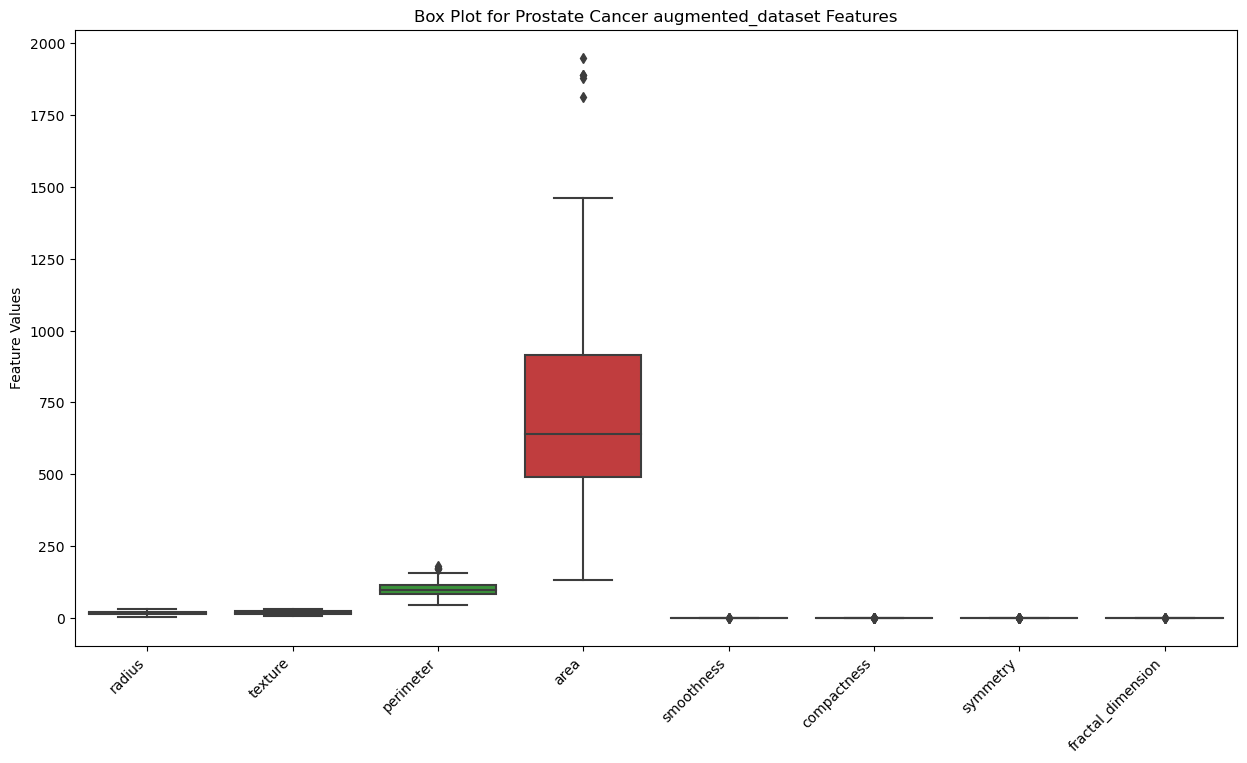

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for all features
plt.figure(figsize=(15, 8))
sns.boxplot(data=X, orient='v')
plt.title('Box Plot for Prostate Cancer augmented_dataset Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45, ha='right')
plt.show()


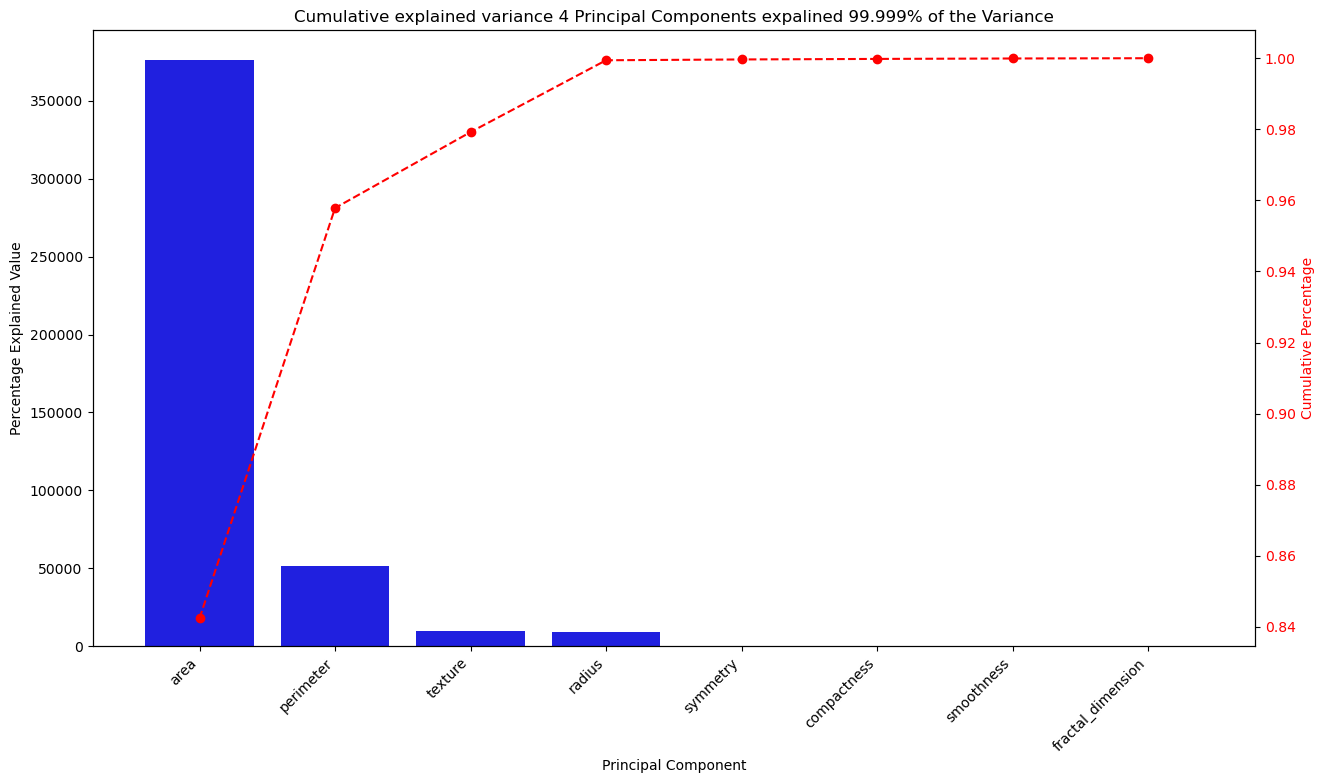

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of each feature
feature_sums = X.sum()

# Sort features in descending order
sorted_features = feature_sums.sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percentage = (sorted_features / sorted_features.sum()).cumsum()

# Pareto chart
plt.figure(figsize=(15, 8))
sns.barplot(x=sorted_features.index, y=sorted_features.values, color='blue')
plt.title('Cumulative explained variance 4 Principal Components expalined 99.999% of the Variance')
plt.ylabel('Percentage Explained Value')
plt.xlabel('Principal Component')
plt.xticks(rotation=45, ha='right')

# Plot the cumulative percentage line
ax2 = plt.twinx()
ax2.plot(sorted_features.index, cumulative_percentage.values, color='red', marker='o', linestyle='--')
ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()






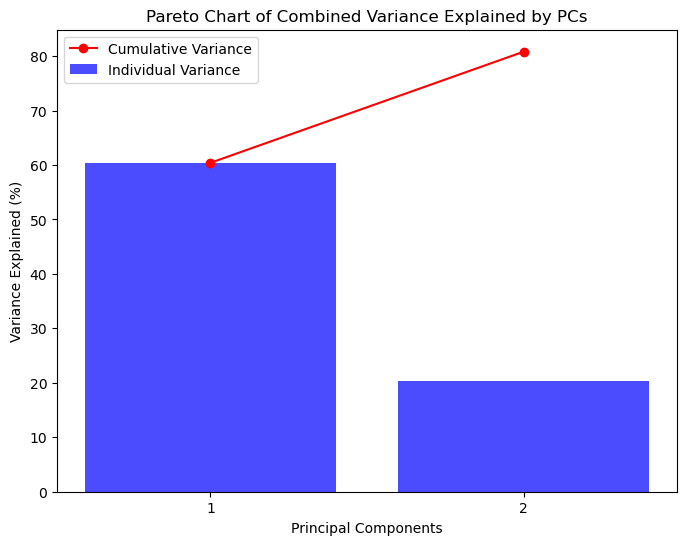

In [40]:
import matplotlib.pyplot as plt

# Variance explained by each PC
variance_explained = [60.4, 20.4]  # Replace with actual values

# Cumulative sum of variance explained
cumulative_variance = [sum(variance_explained[:i+1]) for i in range(len(variance_explained))]

# Plot Pareto chart
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variance_explained)+1), variance_explained, color='blue', alpha=0.7, align='center')
plt.plot(range(1, len(variance_explained)+1), cumulative_variance, color='red', marker='o')
plt.title('Pareto Chart of Combined Variance Explained by PCs')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.xticks(range(1, len(variance_explained)+1))
plt.legend(['Cumulative Variance', 'Individual Variance'])
plt.show()




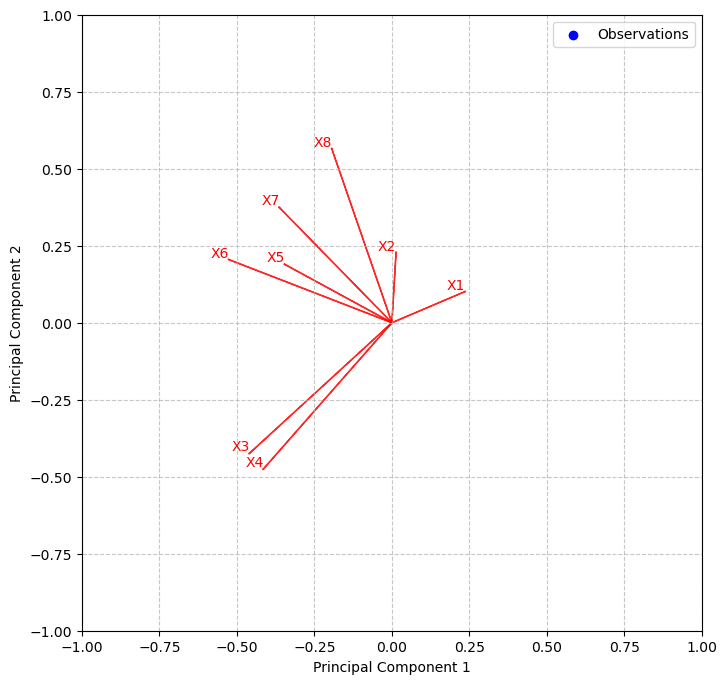

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Principal Components
PC1_loadings = np.array([0.23442707, 0.01327434, -0.45862963, -0.4138959, -0.34484468, -0.5248792, -0.36242963, -0.19350845])
PC2_loadings = np.array([0.10051375, 0.2263316, -0.42323362, -0.47418633, 0.18907743, 0.20449024, 0.37340925, 0.56364051])

# Data points (observations)
data_points = np.array([[1, 2, 3, 4, 5, 6, 7, 8],  # Replace with your actual data
                        [2, 3, 4, 5, 6, 7, 8, 9]])  # Replace with your actual data

# Biplot
plt.figure(figsize=(8, 8))

# Plot observations
plt.scatter(data_points[0], data_points[1], color='blue', marker='o', label='Observations')

# Plot variable loadings
for i, (pc1_loading, pc2_loading) in enumerate(zip(PC1_loadings, PC2_loadings)):
    plt.arrow(0, 0, pc1_loading, pc2_loading, color='red', alpha=0.8)
    plt.text(pc1_loading, pc2_loading, f'X{i+1}', color='red', ha='right', va='bottom')

# Set axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set plot limits
plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Show plot
plt.show()


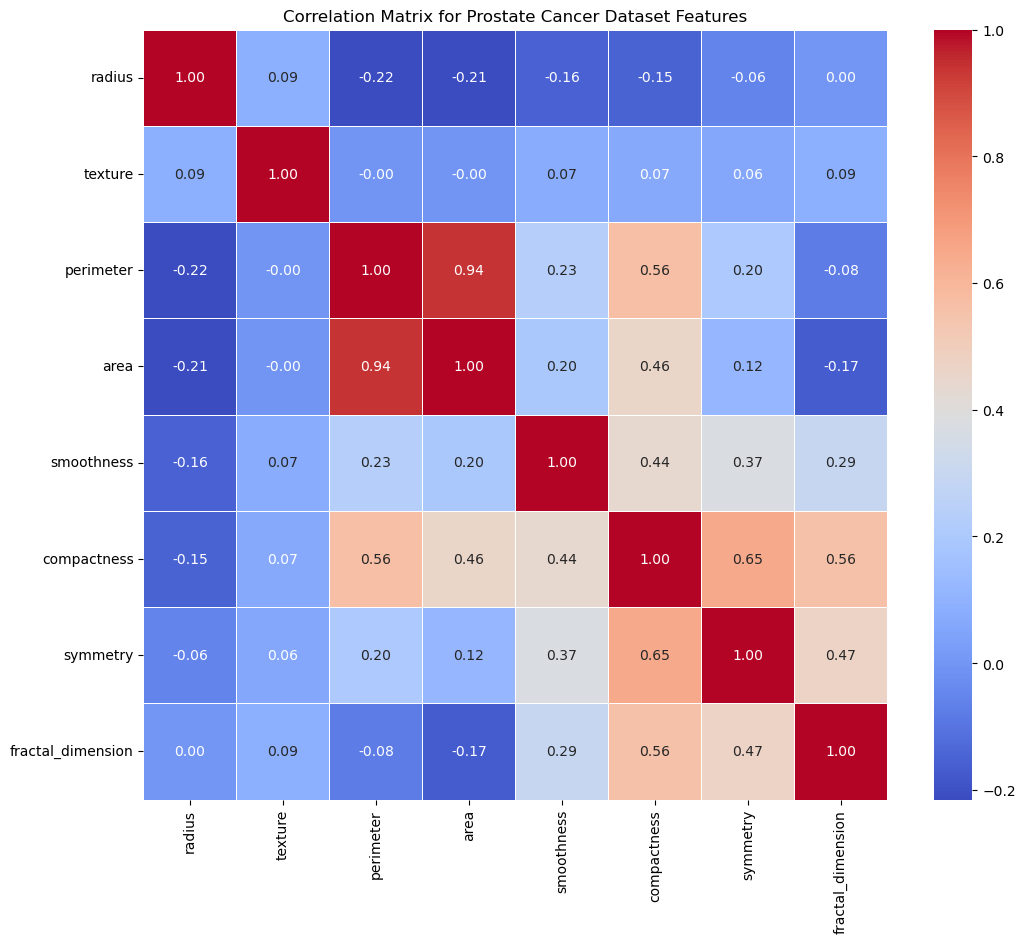

In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is your feature matrix

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Calculate the correlation matrix for standardized features
correlation_matrix = np.corrcoef(X_standardized, rowvar=False)

# Get numeric column names
numeric_columns = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, xticklabels=numeric_columns, yticklabels=numeric_columns)
plt.title('Correlation Matrix for Prostate Cancer Dataset Features')
plt.show()



C:\Users\43\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


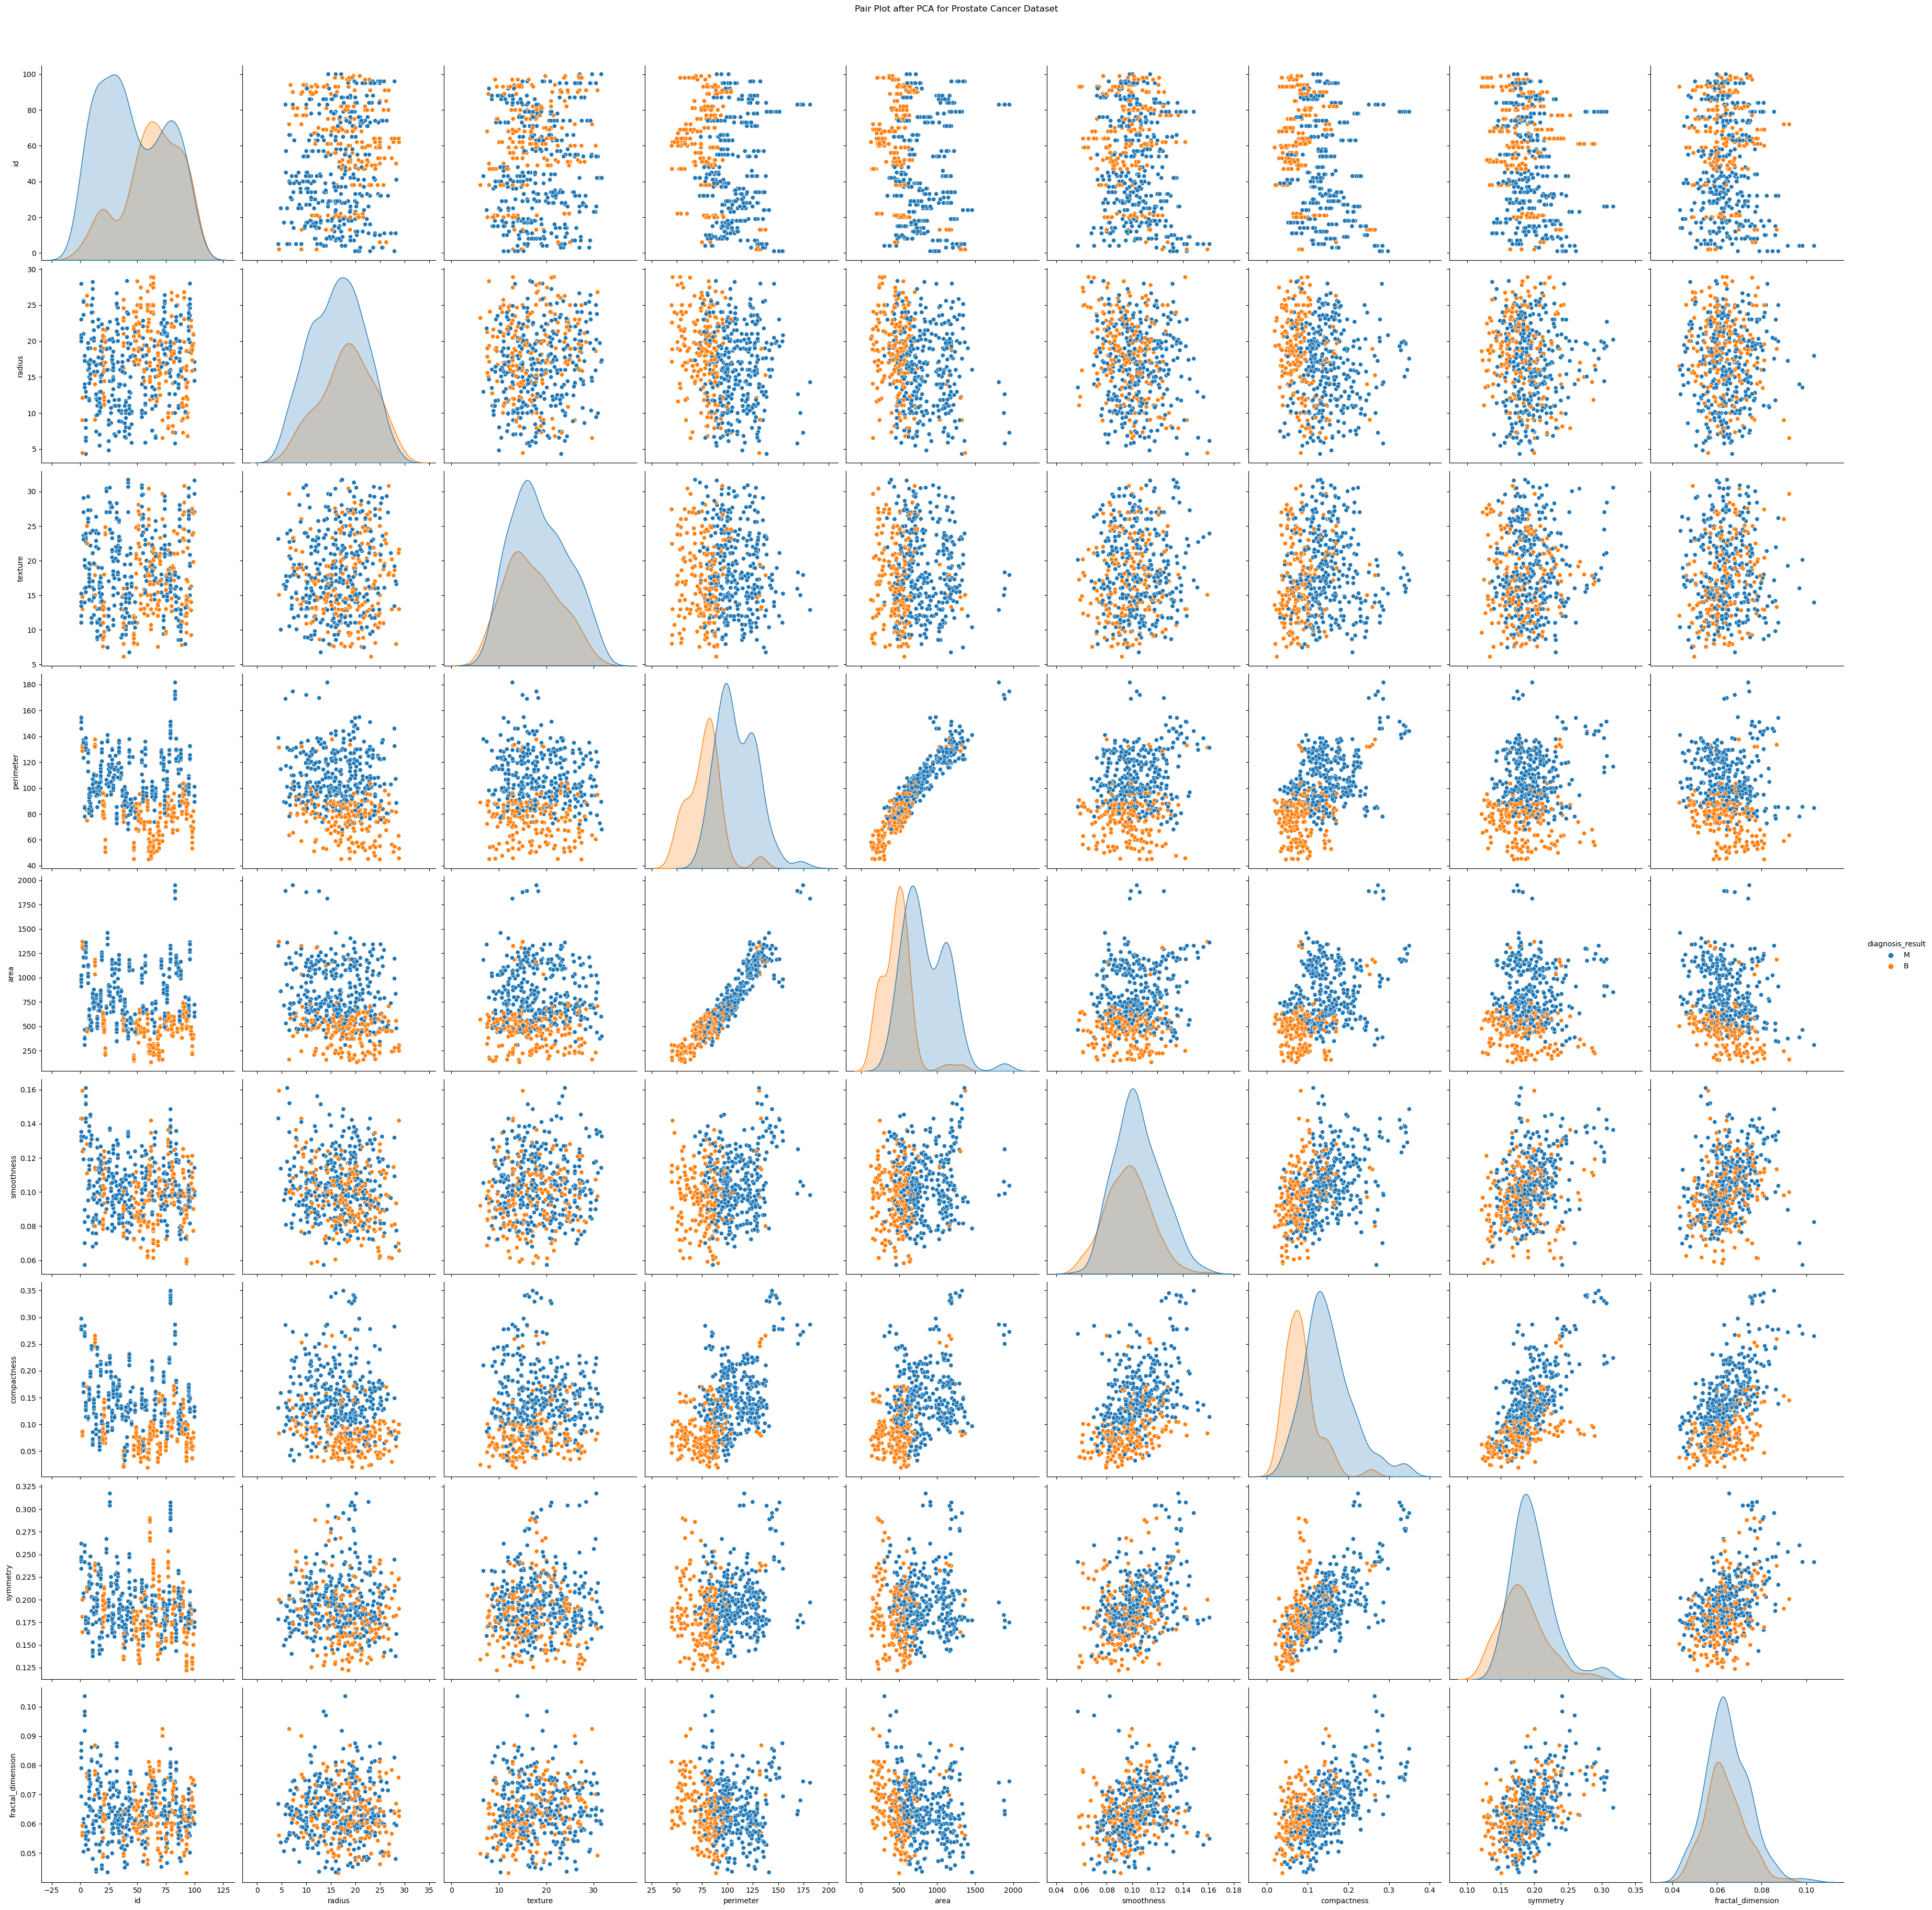

In [43]:
# # Create a pair plot using seaborn
sns.pairplot(augmented_dataset, hue='diagnosis_result', height=4)
plt.suptitle('Pair Plot after PCA for Prostate Cancer Dataset', y=1.02)
plt.show()

In [44]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [46]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 39)
logreg.fit(X_train, y_train) 

LogisticRegression(random_state=39)

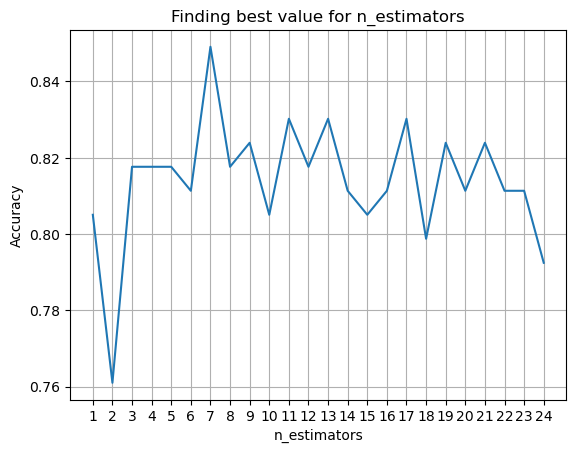

Highest value:  0.8490566037735849


In [48]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 25))
acc = pd.Series()
x = range(1,25)

for i in list(range(1, 25)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))])
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter ranges
n_neighbors_range = range(5, 31)
metric_options = ['euclidean', 'manhattan']
weights_options = ['uniform', 'distance', 'inverse_distance']

# Create parameter grid
param_grid = dict(n_neighbors=n_neighbors_range, metric=metric_options, weights=weights_options)

# Create KNN model and grid search object
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best parameters:', best_params)
# print('Best accuracy:', best_accuracy)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'uniform'}


C:\Users\43\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
260 fits failed out of a total of 780.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\43\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\43\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\43\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\43\anaconda3\Lib\site-packages\sklearn\util

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')

In [51]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 39)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=39)

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [53]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 39)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=39)

In [54]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [55]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [56]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 86.16352201257862
K Nearest neighbors: 81.13207547169812
Support Vector Classifier: 84.90566037735849
Naive Bayes: 82.38993710691824
Decision tree: 83.64779874213836
Random Forest: 88.67924528301887


In [57]:
ls = [accuracy_logreg, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dectree, accuracy_ranfor]
ls_model = [logreg, knn, svc, nb, dectree, ranfor]

BestFitIndex = ls.index(max(ls))
BestFitModelName = ls_model[BestFitIndex]
BestFitModelName

RandomForestClassifier()

In [58]:
from sklearn.metrics import confusion_matrix
y_pred = BestFitModelName.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[45, 14],
       [ 4, 96]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

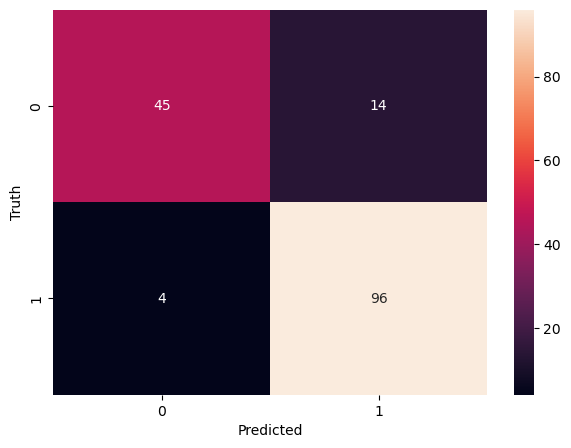

In [59]:
# matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.92      0.76      0.83        59
           M       0.87      0.96      0.91       100

    accuracy                           0.89       159
   macro avg       0.90      0.86      0.87       159
weighted avg       0.89      0.89      0.88       159

